In [56]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV

In [58]:
df = pd.read_excel('app_data.xlsx')

In [59]:
df = df[['Diagnosis_Presumptive', 'Diagnosis', 'Alvarado_Score', 'Appendix_Diameter', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'Stool', 'Psoas_Sign']]

In [62]:
df = df.dropna()

In [64]:
df

,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,Stool,Psoas_Sign
0,appendicitis,appendicitis,4.0,7.1,yes,yes,no,no,yes,37.0,normal,yes
4,appendicitis,appendicitis,5.0,7.0,yes,yes,yes,yes,yes,36.9,constipation,yes
8,appendicitis,no appendicitis,7.0,3.7,yes,no,no,no,yes,37.3,normal,no
9,appendicitis,appendicitis,4.0,8.0,yes,no,no,yes,yes,37.1,normal,no
10,appendicitis,appendicitis,8.0,9.0,yes,no,yes,no,yes,38.0,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...
771,appendicitis,appendicitis,7.0,12.0,yes,no,no,yes,no,38.2,constipation,no
775,appendicitis,appendicitis,7.0,10.0,yes,no,no,yes,no,38.2,normal,no
777,appendicitis,appendicitis,8.0,7.5,yes,no,no,no,yes,39.4,diarrhea,yes
780,appendicitis,appendicitis,9.0,14.0,yes,no,yes,yes,no,37.5,normal,no


In [66]:
features = ['Alvarado_Score', 'Appendix_Diameter', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'Stool', 'Psoas_Sign']

In [68]:
x = df[features].replace({'yes': 0, 'no' : 1, 'normal' : 0, 'constipation' : 1, 'diarrhea' : 2})
y = df['Diagnosis'].replace({'appendicitis' : 0, 'no appendicitis' : 1})

In [70]:
x

,Alvarado_Score,Appendix_Diameter,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,Stool,Psoas_Sign
0,4.0,7.1,0,0,1,1,0,37.0,0,0
4,5.0,7.0,0,0,0,0,0,36.9,1,0
8,7.0,3.7,0,1,1,1,0,37.3,0,1
9,4.0,8.0,0,1,1,0,0,37.1,0,1
10,8.0,9.0,0,1,0,1,0,38.0,0,1
...,...,...,...,...,...,...,...,...,...,...
771,7.0,12.0,0,1,1,0,1,38.2,1,1
775,7.0,10.0,0,1,1,0,1,38.2,0,1
777,8.0,7.5,0,1,1,1,0,39.4,2,0
780,9.0,14.0,0,1,0,0,1,37.5,0,1


In [72]:
y

0      0
4      0
8      1
9      0
10     0
      ..
771    0
775    0
777    0
780    0
781    0
Name: Diagnosis, Length: 456, dtype: int64

In [74]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 0)
model = DecisionTreeClassifier(random_state = 0)

In [75]:
model.fit(train_x, train_y)

DecisionTreeClassifier(random_state=0)

In [78]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [79]:
print(classification_report(test_y, predictions, target_names=['Appendicitis','No Appendicitis']))

                 precision    recall  f1-score   support

   Appendicitis       0.97      0.96      0.97       107
No Appendicitis       0.87      0.90      0.89        30

       accuracy                           0.95       137
      macro avg       0.92      0.93      0.93       137
   weighted avg       0.95      0.95      0.95       137



<Figure size 2000x1000 with 0 Axes>

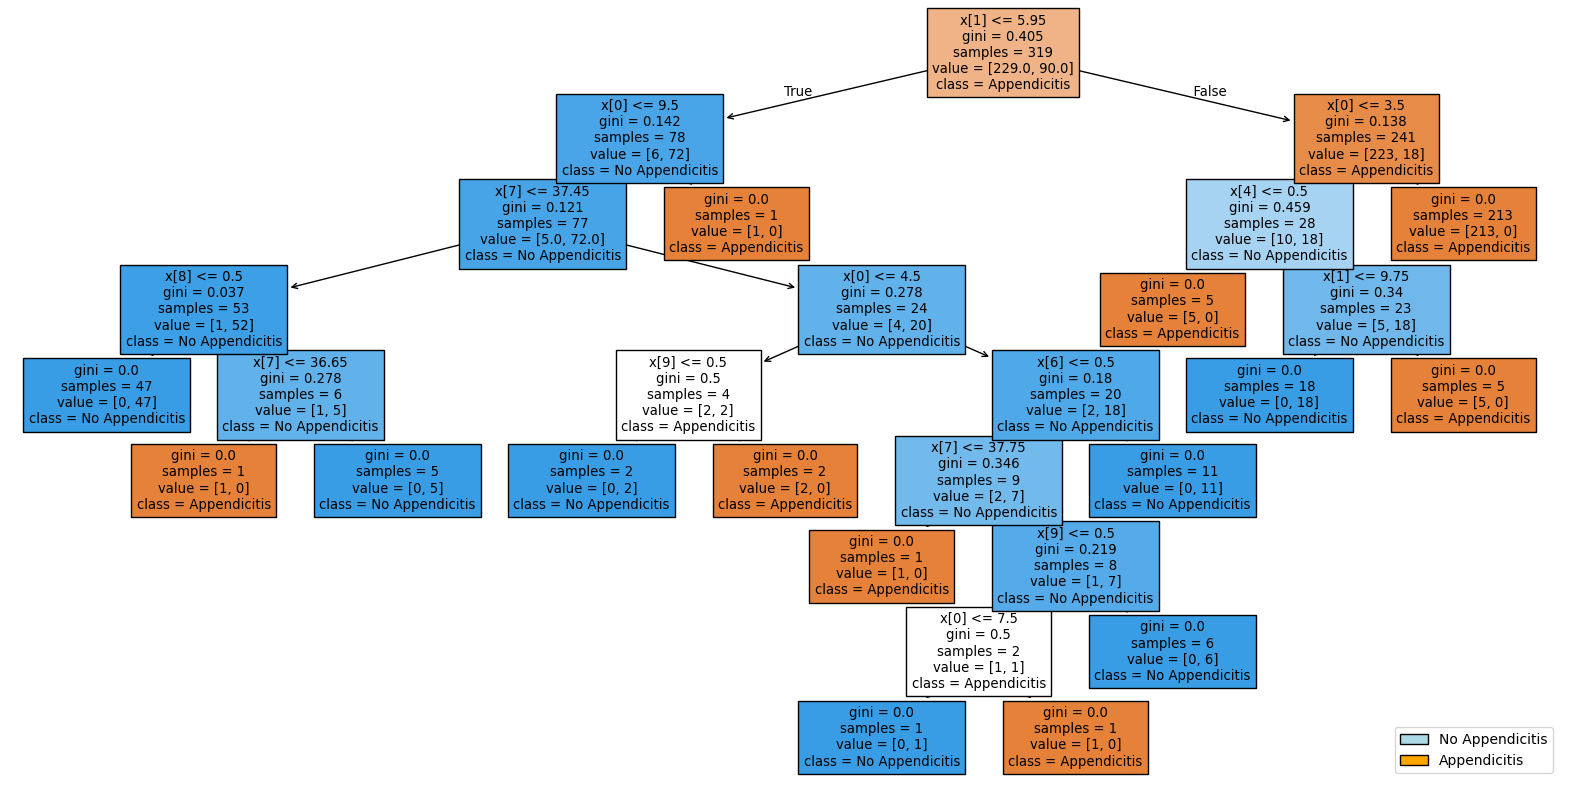

In [81]:
leg = [Patch(facecolor = 'lightblue', edgecolor = 'black', label = 'No Appendicitis'), Patch(facecolor = 'orange', edgecolor = 'black', label = 'Appendicitis')]

plt.figure(figsize = (20, 10))
fig, ax = plt.subplots(figsize=(20,10))
plot_tree(model, filled = True, ax = ax, class_names=["Appendicitis", "No Appendicitis"])
ax.legend(handles = leg, loc = 'lower right')
plt.show()

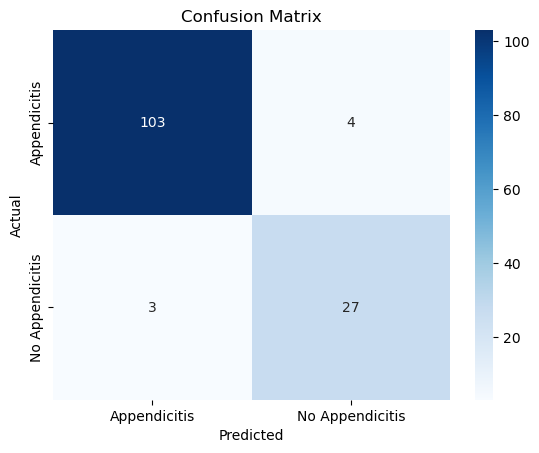

In [83]:
cm = confusion_matrix(test_y, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Appendicitis','No Appendicitis'], yticklabels=['Appendicitis','No Appendicitis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

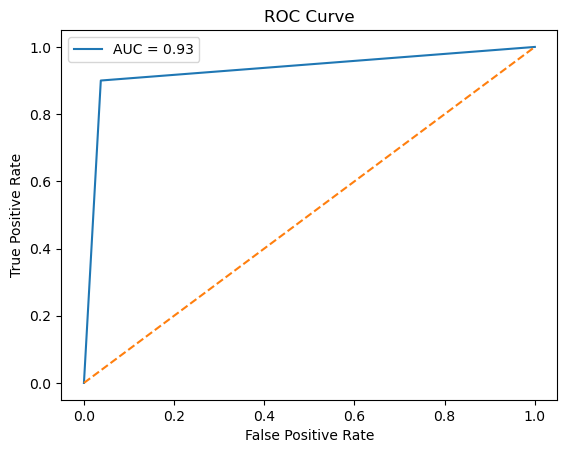

In [84]:
fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [85]:
model.get_depth()

8

In [86]:
gs = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid = {'max_depth' : range(2, 21)}, scoring = 'r2')

In [88]:
gs.fit(train_x, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 21)}, scoring='r2')

In [89]:
model2 = DecisionTreeClassifier(random_state = 0, max_depth = 4)

In [92]:
model2.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [95]:
predictions2 = model2.predict(test_x)
accuracy2 = accuracy_score(test_y, predictions2)
print(f"Accuracy: {accuracy2:.2f}")

Accuracy: 0.96


In [96]:
print(classification_report(test_y, predictions2, target_names=['Appendicitis','No Appendicitis']))

                 precision    recall  f1-score   support

   Appendicitis       0.98      0.96      0.97       107
No Appendicitis       0.88      0.93      0.90        30

       accuracy                           0.96       137
      macro avg       0.93      0.95      0.94       137
   weighted avg       0.96      0.96      0.96       137



<Figure size 2000x1000 with 0 Axes>

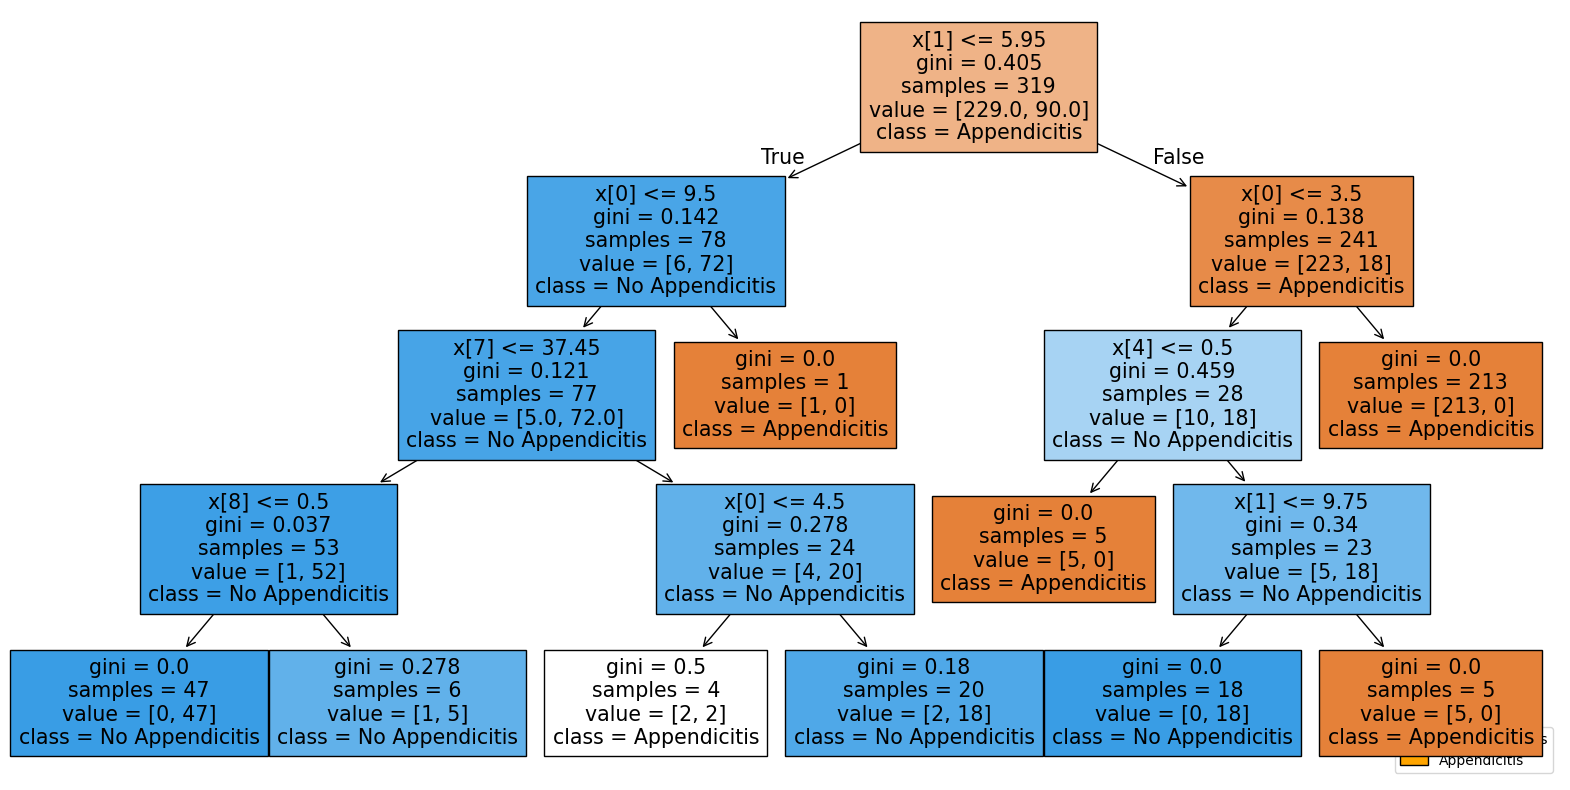

In [99]:
leg = [Patch(facecolor = 'lightblue', edgecolor = 'black', label = 'No Appendicitis'), Patch(facecolor = 'orange', edgecolor = 'black', label = 'Appendicitis')]

plt.figure(figsize = (20, 10))
fig, ax = plt.subplots(figsize=(20,10))
plot_tree(model2, filled = True, ax = ax, class_names=["Appendicitis", "No Appendicitis"])
ax.legend(handles = leg, loc = 'lower right')
plt.show()

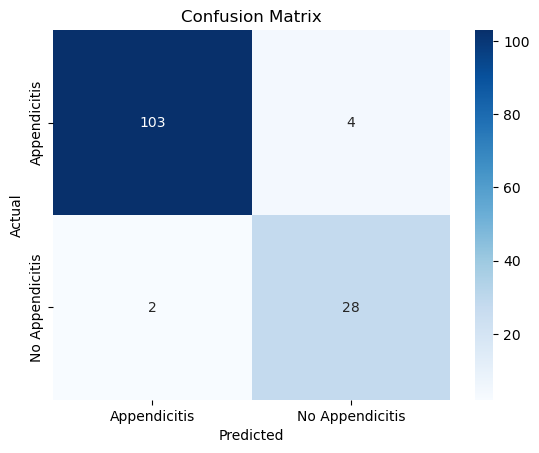

In [101]:
cm = confusion_matrix(test_y, predictions2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Appendicitis','No Appendicitis'], yticklabels=['Appendicitis','No Appendicitis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

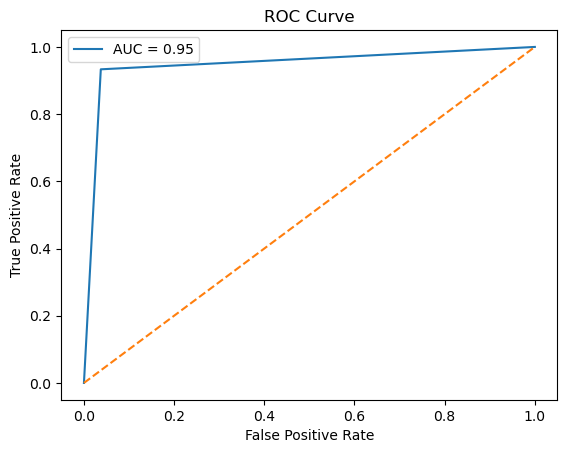

In [103]:
fpr, tpr, thresholds = roc_curve(test_y, predictions2)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()